# 6. Understanding Underfitting and Overfitting

In this workshop, we will explore two important concepts in machine learning: Underfitting and Overfitting. In simple terms, **underfitting** happens when a model cannot capture the underlying structure of the data. This generally leads to poor performance both on training and unseen data. In contrast, **overfitting** happens when a model is too complex and learns noise instead of true patterns. This leads to excellent performance on training data but poor generalization to unseen data.

While developing a prediction model, our goal is to find a right balance between underfitting and overfitting. In this workshop, we will illustrate these concepts using two examples. First a noisy parabola, and then a real world example.


## 6.1 Problem definition (General concepts)

### 6.2 Fitting a Model to Noisy Data

To understand **underfitting** and **overfitting**, we will use a simple **synthetic dataset**. We generate data based on a **true parabolic relationship** ($y = x^2$), but with added noise to simulate real-world uncertainty.  

In this example, we already know the true relationship between the data points, but in real-world problems, this is unknown. Therefore, we will fit the data using different regressors and evaluate their performance.

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Generate random dataset

First, we create the synthetic dataset based on a **true parabolic relationship** including **normally distributed noise**.

In [185]:
# Generate dataset
np.random.seed(42)
X = np.linspace(-3, 4, 300).reshape(-1, 1)
y_true = X**2  # True parabolic relationship
y = y_true + np.random.normal(scale=4, size=X.shape)  # Add noise

Let's visualize the noisy dataset alongside the true parabolic relationship to better understand the concept. A balanced model should be able to generalize from the data, detecting the underlying relationship while ignoring the noise.

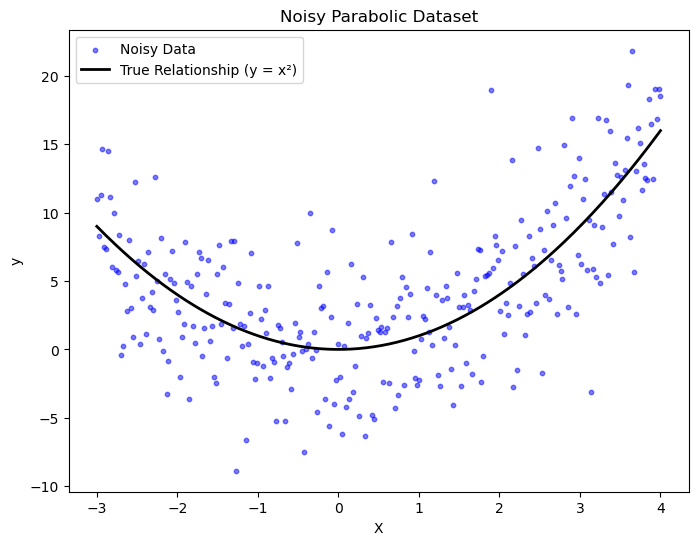

In [186]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Noisy Data", color="blue", alpha=0.5, s=10)
plt.plot(X, y_true, label="True Relationship (y = x²)", color="black", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Noisy Parabolic Dataset")
plt.show()

Next, we will split the data into **training** and **test** sets. The **training set** will be used to **fit** our models, while the **test set** will allow us to evaluate how well our models generalize to unseen data. For this, we save 30% of the data points for testing.


In [187]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sort the X_test by order
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]

# Sort the X_train by order
sorted_indices = np.argsort(X_train.flatten())
X_train_sorted = X_train[sorted_indices]
y_train_sorted = y_train[sorted_indices]

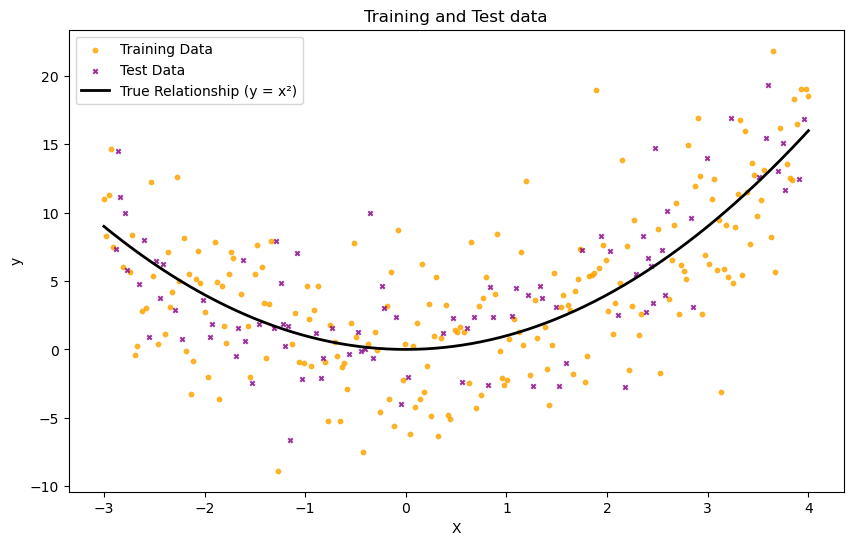

In [188]:
# Plot results
plt.figure(figsize=(10, 6))

# Plot training data as scatter points
plt.scatter(X_train, y_train, color='orange', label='Training Data',alpha=0.8, s=10)

# Plot training data as scatter points
plt.scatter(X_test, y_test, color='purple', label='Test Data',marker='x',alpha=0.8, s=10)

# Plot
plt.plot(X,y_true,color="black",label = "True Relationship (y = x²)",alpha=1,linewidth=2)

# Labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Test data')
plt.legend()
plt.show()

We can choose from many regressors to find a balanced model, but the selection largely depends on the nature of the data and the hypotheses we want to test. In this case, we’ve chosen three models to illustrate different approaches. 

- **Linear Regressor:** This model assumes a linear relationship between the input and output. This might not be the best idea (given that we already know the true relationship, but it helps illustrate the concept of **underfitting**.
  
- **Polynomial Regressor:** This model fits a higher-degree polynomial to the data, making it better suited for capturing more complex, non-linear relationships, though it may overfit when the degree is too high.
  
- **Decision Tree:** This model splits the data into regions based on feature values, offering flexibility to capture complex patterns but can easily overfit if not properly constrained.

These choices help us demonstrate how different models can perform on the same data and highlight the trade-offs between underfitting and overfitting.

### Fitting the models

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Training using Train Set
# Linear Regression Model 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Polynomial Regression Model
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

# Decision tree
tree_reg = DecisionTreeRegressor(max_depth=None)
tree_reg.fit(X_train, y_train)

## Fitting the models

## Train data
# Linear Regression Model
y_pred_lin_train = lin_reg.predict(X_train_sorted)

# Polynomial Regression Model
y_pred_poly_train = poly_reg.predict(X_train_sorted)

# Decision Tree Model
y_pred_tree_train = tree_reg.predict(X_train_sorted)

## Test data
# Linear Regression Model
y_pred_lin_test = lin_reg.predict(X_test_sorted)

# Polynomial Regression Model
y_pred_poly_test = poly_reg.predict(X_test_sorted)

# Decision Tree Model
y_pred_tree_test = tree_reg.predict(X_test_sorted)


To illustrate an **overfitted**, **underfitted**, and **balanced model**, we modified certain parameters of the models. For example, for the polynomial regression model, we set the degree to 2 (which conveniently matches the true quadratic relationship). For the decision tree, we set the maximum depth hyperparameter to None, allowing it to learn all features from the training set. In practice, this setting would likely lead the decision tree to overfit by capturing noise and unnecessary details in the data.

### Plot Model Results (Training & Testing)

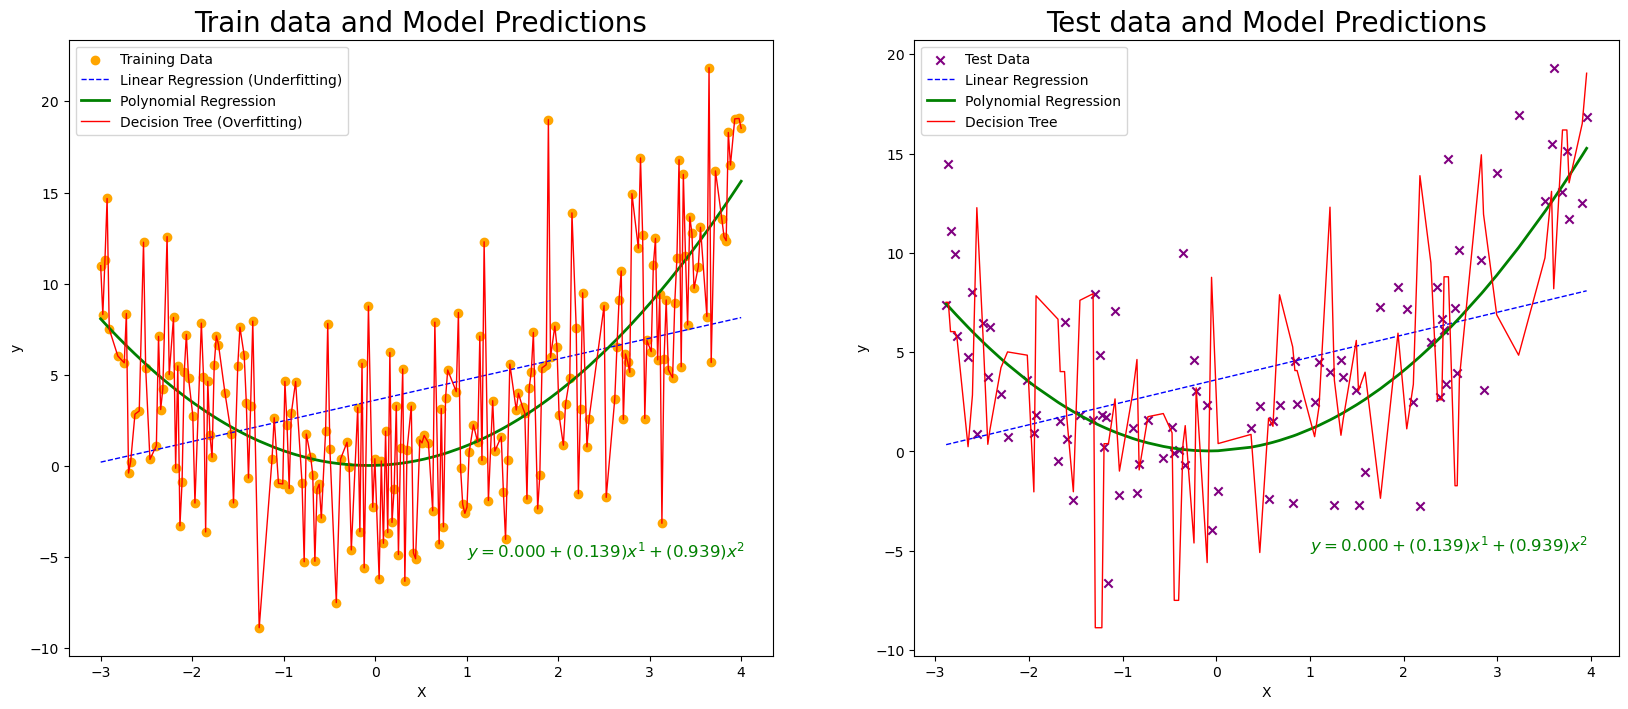

In [190]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
# Plot training data as scatter points
plt.scatter(X_train, y_train, color='orange', label='Training Data')

# Extract coefficients Polynomial Regression Model
poly_coef = poly_reg.named_steps['linearregression'].coef_
poly_formula_latex = f"$y = {poly_coef[0][0]:.3f} + ({poly_coef[0][1]:.3f})x^1 + ({poly_coef[0][2]:.3f})x^2$"

# Plot predictions
plt.plot(X_train_sorted, y_pred_lin_train, label='Linear Regression (Underfitting)', color='blue', linestyle='--', linewidth=1)
plt.plot(X_train_sorted, y_pred_poly_train, label='Polynomial Regression', color='green', linestyle='-', linewidth=2)
plt.plot(X_train_sorted, y_pred_tree_train, label='Decision Tree (Overfitting)', color='red', linestyle='-', linewidth=1)
plt.text(1, -5, poly_formula_latex, fontsize=12, color='green')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Train data and Model Predictions', fontsize= 20)
plt.legend()
#plt.show()

plt.subplot(1,2,2)
# Plot training data as scatter points
plt.scatter(X_test, y_test, color='purple', label='Test Data',marker='x')

# Plot predictions for the continuous range (smooth lines)
plt.plot(X_test_sorted, y_pred_lin_test, label='Linear Regression', color='blue', linestyle='--', linewidth=1)
plt.plot(X_test_sorted, y_pred_poly_test, label='Polynomial Regression', color='green', linestyle='-', linewidth=2)
plt.plot(X_test_sorted, y_pred_tree_test, label='Decision Tree', color='red', linestyle='-', linewidth=1)

plt.text(1, -5, poly_formula_latex, fontsize=12, color='green')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test data and Model Predictions',fontsize=20)
plt.legend()
plt.show()



In the plots above , we can observe the performance of each model.

- **Decision Tree (Overfitting)**: The decision tree fits the training data perfectly (left), learning every detail, which leads to overfitting. It struggles to generalize to the test data (rigth), where it performs poorly.
  
- **Linear Regression (Underfitting)**: The linear regression model is too simple, unable to capture the quadratic relationship in the data, leading to underfitting. It performs poorly on both the training and test data.
  
- **Polynomial Regression (Balanced)**: The polynomial regression model captures the underlying quadratic relationship well, performing well on both the training and test data without overfitting.


We can also seen this behavior if we evaluate the performance using a metric such as the **mean squared error** for all models for the train and test set.

In [191]:
from sklearn.metrics import mean_squared_error
mse_lin = mean_squared_error(y_train_sorted, y_pred_lin_train)
mse_poly = mean_squared_error(y_train_sorted, y_pred_poly_train)
mse_tree = mean_squared_error(y_train_sorted, y_pred_tree_train)

# DataFrame to display the results in a table format
mse_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (degree=2)', 'Decision Tree'],
    'Mean Squared Error [Train Set]': [mse_lin, mse_poly, mse_tree]
})

mse_lin_test = mean_squared_error(y_test_sorted, y_pred_lin_test)
mse_poly_test = mean_squared_error(y_test_sorted, y_pred_poly_test)
mse_tree_test = mean_squared_error(y_test_sorted, y_pred_tree_test)

mse_table['Mean Squared Error [Test Set]'] = [mse_lin_test, mse_poly_test, mse_tree_test]
mse_table.round(2)



,Model,Mean Squared Error [Train Set],Mean Squared Error [Test Set]
0,Linear Regression,29.02,24.08
1,Polynomial Regression (degree=2),17.04,11.51
2,Decision Tree,0.00,36.58


The Mean Squared Error (MSE) values reinforce our observations from the plots. The decision tree has zero mean squared error on the training set, indicating overfitting, but its performance on the test set is poor. The linear regression model has a relatively high error on both the training and test sets, showing underfitting. The polynomial regression results in a good balance, with lower errors on both sets, indicating good generalization.

### 6.3 Fitting a model to predict water level

In the previous example, we knew the true underlying relationship, so it was easy to find a balance model. However, this is not the case with real-world problems. For the second part of the workshop, we are going to use a dataset that we have been using for previous workshops.

![Station](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Overzicht_stuwcomplex_met_schutsluis_-_Hagestein_-_20357221_-_RCE.jpg/800px-Overzicht_stuwcomplex_met_schutsluis_-_Hagestein_-_20357221_-_RCE.jpg?20241107202301)


In short, the task is to predict the water level at the Hagestein station in The Netherlands using a selection of five meteorological and hydrological variables: the discharge of the Rhine (QRHINE) and Meuse (QMEUSE) at the Dutch border, the water level of the North Sea (WLHv), precipitation (RH) and evaporation (EV24). For more details, check [Hauswirth et al. (2021)](https://doi.org/10.1016/j.advwatres.2021.104017).

To start, we load the data, select the variables, and split the dataset into train and test sets. We also define a random_state to guarantee that we get the same results.

In [192]:
# Load the data
data_url = "https://raw.githubusercontent.com/Jignesh1594/CodeGeoworkshop_02_understanding_RF/master/data.csv"
data = pd.read_csv(data_url, delimiter=",", on_bad_lines='skip')

# Select input and output variables
input_data = data[['WLHv', 'RH', 'EV24', 'QMeuse', 'QRhine']]
output_data = data['value']

# Chronological Train-Test Split
train_size = int(0.80 * len(input_data))  # 80% for training/validation, 20% for testing

X_trainval, X_test = input_data.iloc[:train_size], input_data.iloc[train_size:]
y_trainval, y_test = output_data.iloc[:train_size], output_data.iloc[train_size:]

# Global variable
random_state = 27

As in the previous example, we will try a polynomial regressor and a Random Forest. In this exercise, we’ll modify certain parameters to find model configurations that avoid both overfitting and underfitting.

### Polynomial Regression

To start, we will try different configurations of a polynomial regression model. Specifically, we'll experiment with different polynomial degrees ( 1, 3 and 10) to see how changing the model's complexity affects its ability to generalize without overfitting or underfitting.

In [193]:
from sklearn.pipeline import Pipeline

def polynomial_model(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])
    
# Train an underfitting polynomial regression model (degree = 1)
poly_d1 = polynomial_model(degree=1)
poly_d1.fit(X_trainval, y_trainval)
y_train_poly_d1 = poly_d1.predict(X_trainval)
y_test_pred_poly_d1 = poly_d1.predict(X_test)

# Train an underfitting polynomial regression model (degree = 3)
poly_d3 = polynomial_model(degree=3)
poly_d3.fit(X_trainval, y_trainval)
y_train_poly_d3 = poly_d3.predict(X_trainval)
y_test_pred_poly_d3 = poly_d3.predict(X_test)

# Train an overfitting polynomial regression model (degree = 10)
poly_d10 = polynomial_model(degree=10)
poly_d10.fit(X_trainval, y_trainval)
y_train_poly_d10 = poly_d10.predict(X_trainval)
y_test_pred_poly_d10 = poly_d10.predict(X_test)

To better understand the performance of our models, we will calculate the residuals between the actual and predicted values. This will allow us to evaluate how well each model fits the data.

In [194]:
# Calculate residuals (actual - predicted)
train_residuals_d1 = np.abs(y_trainval - y_train_poly_d1)
test_residuals_d1 =  np.abs(y_test - y_test_pred_poly_d1)

train_residuals_d3 =  np.abs(y_trainval - y_train_poly_d3)
test_residuals_d3 =  np.abs(y_test - y_test_pred_poly_d3)

train_residuals_d10 =  np.abs(y_trainval - y_train_poly_d10)
test_residuals_d10 =  np.abs(y_test - y_test_pred_poly_d10)

# Calculate the absolute residuals and their means
data = {
    'Polynomial Degree': ['1', '3', '10'],
    'Train Residual Mean': [np.mean(train_residuals_d1), 
                            np.mean(train_residuals_d3), 
                            np.mean(train_residuals_d10)],
    'Train Residual SD': [np.std(train_residuals_d1), 
                            np.std(train_residuals_d3), 
                            np.std(train_residuals_d10)],
    
    'Test Residual Mean': [np.mean(test_residuals_d1), 
                           np.mean(test_residuals_d3), 
                           np.mean(test_residuals_d10)],
    'Test Residual SD': [np.std(test_residuals_d1), 
                           np.std(test_residuals_d3), 
                           np.std(test_residuals_d10)]
}

# Creating the DataFrame
residuals_df = pd.DataFrame(data)

residuals_df

,Polynomial Degree,Train Residual Mean,Train Residual SD,Test Residual Mean,Test Residual SD
0,1,16.558501,17.827113,19.733392,20.444826
1,3,13.192645,15.350036,16.793330,16.807004
2,10,12.696232,14.745966,30.245742,434.479624


The table above shows the mean and standard deviation (SD) of the absolute residuals for polynomial regression models with degrees 1, 3, and 10, applied to both the training and test datasets.


- **Degree 1**: The model performs similarly on both train and test sets, but with high residual variation, indicating **underfitting**.
- **Degree 3**: The model fits the data well, with relatively low residuals on both sets, suggesting a good balance between fitting and generalization.
- **Degree 10**: The model fits the training data well, but shows poor performance on the test set with very high residuals, indicating **overfitting**.

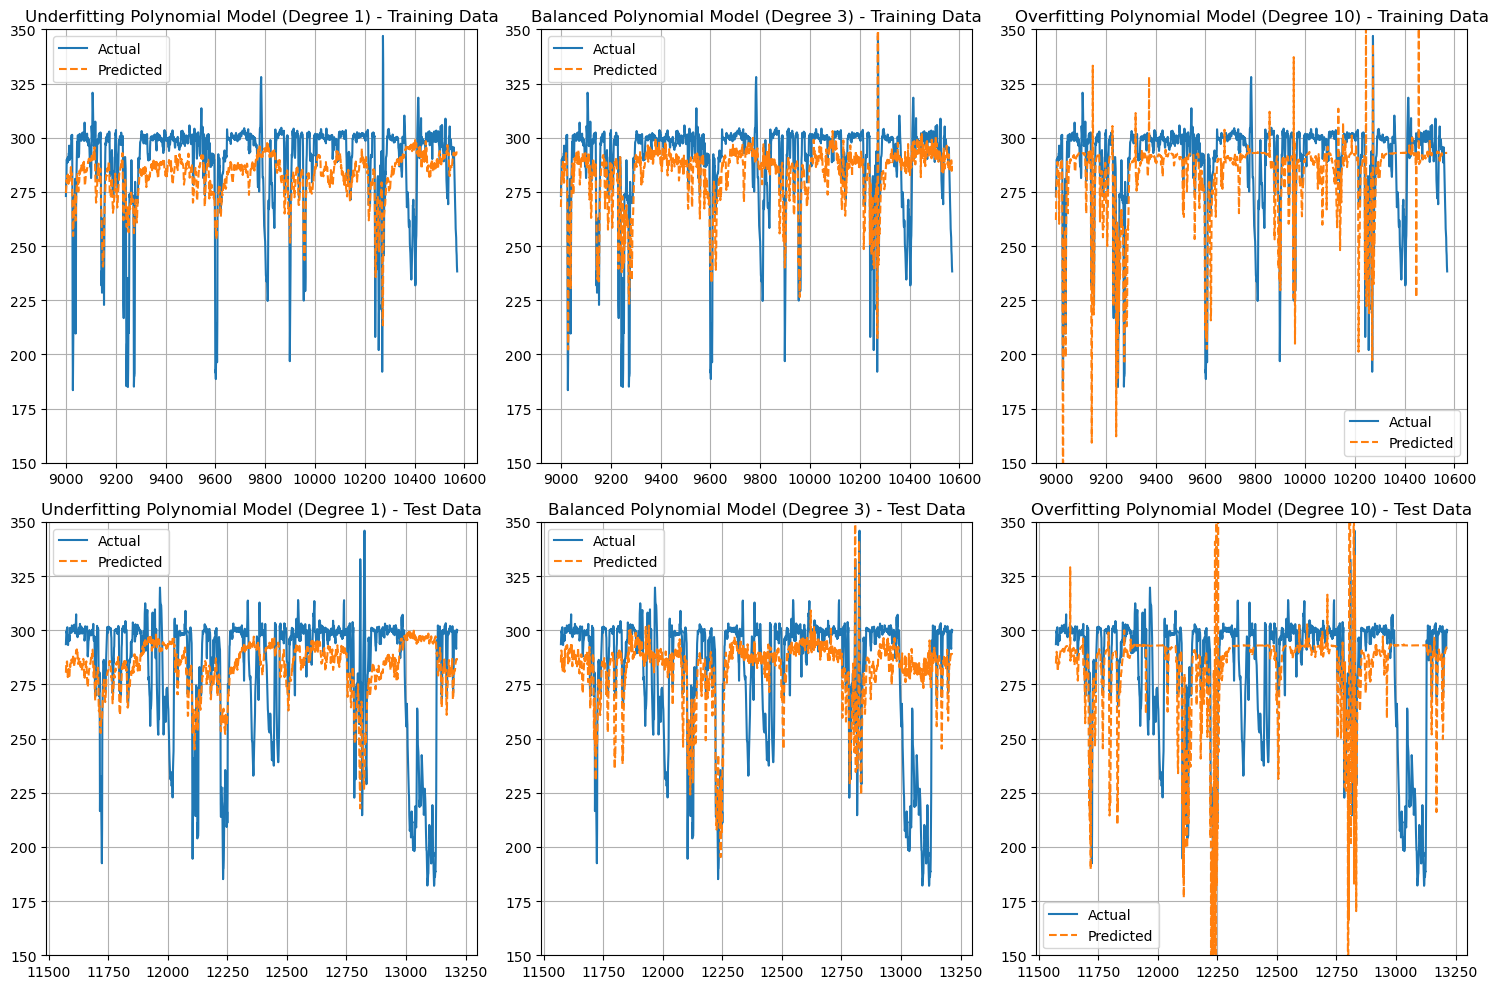

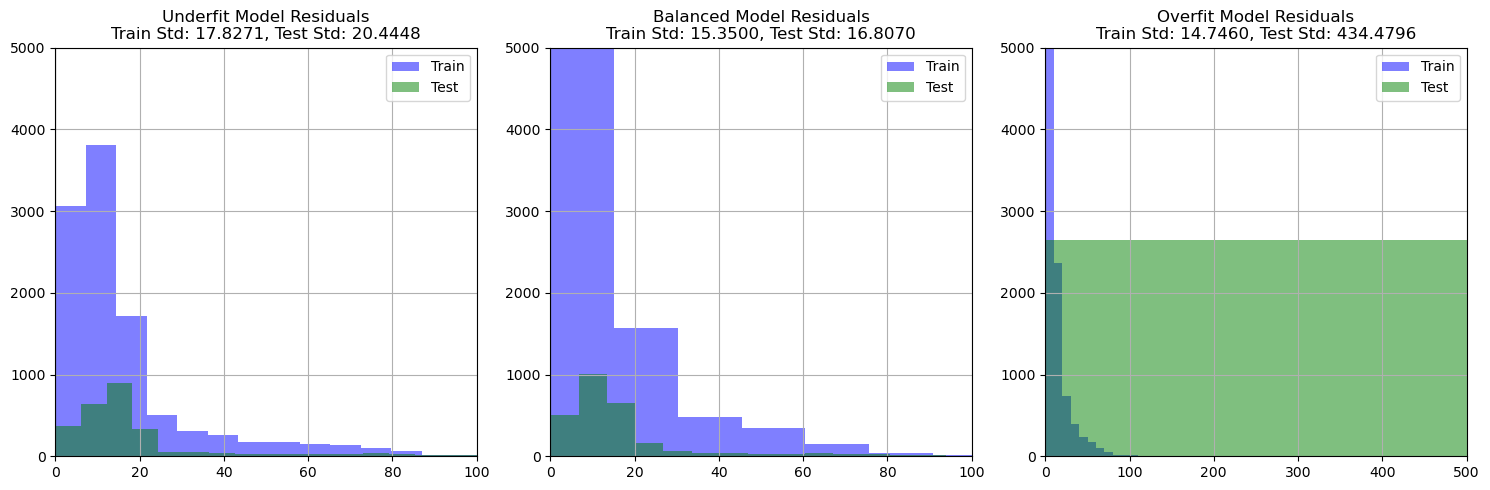

In [195]:
# Create figure for residual plots
plt.figure(figsize=(15, 10))

# 1. Underfit Model Residuals
plt.subplot(2, 3, 1)
plt.plot(y_trainval.index[9000:], y_trainval[9000:], label='Actual')
plt.plot(y_trainval.index[9000:], y_train_poly_d1[9000:], label='Predicted', linestyle='dashed')
plt.title("Underfitting Polynomial Model (Degree 1) - Training Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(y_test.index[1000:], y_test[1000:], label='Actual')
plt.plot(y_test.index[1000:], y_test_pred_poly_d1[1000:], label='Predicted', linestyle='dashed')
plt.title("Underfitting Polynomial Model (Degree 1) - Test Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

# 2. Balanced Model Residuals
plt.subplot(2, 3, 2)
plt.plot(y_trainval.index[9000:], y_trainval[9000:], label='Actual')
plt.plot(y_trainval.index[9000:], y_train_poly_d3[9000:], label='Predicted', linestyle='dashed')
plt.title("Balanced Polynomial Model (Degree 3) - Training Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(y_test.index[1000:], y_test[1000:], label='Actual')
plt.plot(y_test.index[1000:], y_test_pred_poly_d3[1000:], label='Predicted', linestyle='dashed')
plt.title("Balanced Polynomial Model (Degree 3) - Test Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

# 3. Overfit Model Residuals
plt.subplot(2, 3, 3)
plt.plot(y_trainval.index[9000:], y_trainval[9000:], label='Actual')
plt.plot(y_trainval.index[9000:], y_train_poly_d10[9000:], label='Predicted', linestyle='dashed')
plt.title("Overfitting Polynomial Model (Degree 10) - Training Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(y_test.index[1000:], y_test[1000:], label='Actual')
plt.plot(y_test.index[1000:], y_test_pred_poly_d10[1000:], label='Predicted', linestyle='dashed')
plt.title("Overfitting Polynomial Model (Degree 10) - Test Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Summary statistics for residuals
plt.figure(figsize=(15, 5))

# Calculate histograms of residuals
plt.subplot(1, 3, 1)
plt.hist(train_residuals_d1, bins=20, alpha=0.5, color='blue', label='Train')
plt.hist(test_residuals_d1, bins=20, alpha=0.5, color='green', label='Test')
plt.title(f'Underfit Model Residuals\nTrain Std: {np.std(train_residuals_d1):.4f}, Test Std: {np.std(test_residuals_d1):.4f}')
plt.axvline(x = 0, color = "black")
plt.ylim(0,5000)
plt.xlim(0,100)
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(train_residuals_d3, bins=20, alpha=0.5, color='blue', label='Train')
plt.hist(test_residuals_d3, bins=20, alpha=0.5, color='green', label='Test')
plt.title(f'Balanced Model Residuals\nTrain Std: {np.std(train_residuals_d3):.4f}, Test Std: {np.std(test_residuals_d3):.4f}')
plt.axvline(x = 0, color = "black")
plt.ylim(0,5000)
plt.xlim(0,100)
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(train_residuals_d10, bins=20, alpha=0.5, color='blue', label='Train')
plt.hist(test_residuals_d10, bins=20, alpha=0.5, color='green', label='Test')
plt.title(f'Overfit Model Residuals\nTrain Std: {np.std(train_residuals_d10):.4f}, Test Std: {np.std(test_residuals_d10):.4f}')
plt.axvline(x = 0, color = "black")
plt.ylim(0,5000)
plt.xlim(0,500)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Random Forest

Next, we will try using a Random Forest Regressor to model the data. To show how the hyperparameter selection can lead to underfitting and overfitting, we are going to modify the number of estimators (2, 100, and 100) and the maximum depth of the forest (2, 5, and No limit) in three experiments. 

| Experiment | n_estimators    | max_depth       |
|------------|-----------------|-----------------|
| Exp 1      | 2               | 2               |
| Exp 2      | 100             | 5               |
| Exp 3      | 1000            | None            |



### Random Forest (Underfit) Model

In [225]:
# import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

n_estimators_underfit = 2
max_depth_underfit  = 2

# Train a shallow random forest
rf_underfit = RandomForestRegressor(n_estimators=n_estimators_underfit, max_depth=max_depth_underfit, random_state=random_state)
rf_underfit.fit(X_trainval, y_trainval)

# Predictions for underfit model
y_train_rf_pred_underfit = rf_underfit.predict(X_trainval)
y_test_rf_pred_underfit = rf_underfit.predict(X_test)

### Random Forest (Balanced) Model

In [226]:
n_estimators_balanced = 100
max_depth_balanced  = 5

# Train a shallow random forest
rf_balanced = RandomForestRegressor(n_estimators=n_estimators_balanced, max_depth=max_depth_balanced, random_state=random_state)
rf_balanced.fit(X_trainval, y_trainval)

# Predictions for balanced model
y_train_rf_pred_balanced = rf_balanced.predict(X_trainval)
y_test_rf_pred_balanced = rf_balanced.predict(X_test)

### Random Forest (Overfit) Model

In [227]:
n_estimators_overfit = 1000
max_depth_overfit = None

# Train a shallow random forest
rf_overfit = RandomForestRegressor(n_estimators=n_estimators_overfit, max_depth=max_depth_overfit, random_state=random_state)
rf_overfit.fit(X_trainval, y_trainval)

# Predictions for overfit model
y_train_rf_pred_overfit = rf_overfit.predict(X_trainval)
y_test_rf_pred_overfit = rf_overfit.predict(X_test)

In [228]:
# Calculate residuals (actual - predicted)
train_rf_residuals_underfit = np.abs(y_trainval - y_train_rf_pred_underfit)
test_rf_residuals_underfit = np.abs(y_test - y_test_rf_pred_underfit)

train_rf_residuals_balanced = np.abs(y_trainval - y_train_rf_pred_balanced)
test_rf_residuals_balanced = np.abs(y_test - y_test_rf_pred_balanced)

train_rf_residuals_overfit = np.abs(y_trainval - y_train_rf_pred_overfit)
test_rf_residuals_overfit = np.abs(y_test - y_test_rf_pred_overfit)


# Calculate the absolute residuals and their means
data = {
    'Number of estimators': ['2', '100', '1000'],
    'Maximum depth': ['2', '5', 'None'],
    'Train Residual Mean': [np.mean(train_rf_residuals_underfit), 
                            np.mean(train_rf_residuals_balanced), 
                            np.mean(train_rf_residuals_overfit)],
    'Train Residual SD': [np.std(train_rf_residuals_underfit), 
                            np.std(train_rf_residuals_balanced), 
                            np.std(train_rf_residuals_overfit)],
    
    'Test Residual Mean': [np.mean(test_rf_residuals_underfit), 
                           np.mean(test_rf_residuals_balanced), 
                           np.mean(test_rf_residuals_overfit)],
    'Test Residual SD': [np.std(test_rf_residuals_underfit), 
                           np.std(test_rf_residuals_balanced), 
                           np.std(test_rf_residuals_overfit)]
}

# Creating the DataFrame
residuals_rf_df = pd.DataFrame(data)

residuals_rf_df


,Number of estimators,Maximum depth,Train Residual Mean,Train Residual SD,Test Residual Mean,Test Residual SD
0,2,2,12.331110,12.367722,13.552973,13.621331
1,100,5,9.381419,10.662357,11.706743,11.860476
2,1000,None,3.532401,4.190966,11.635471,12.214523


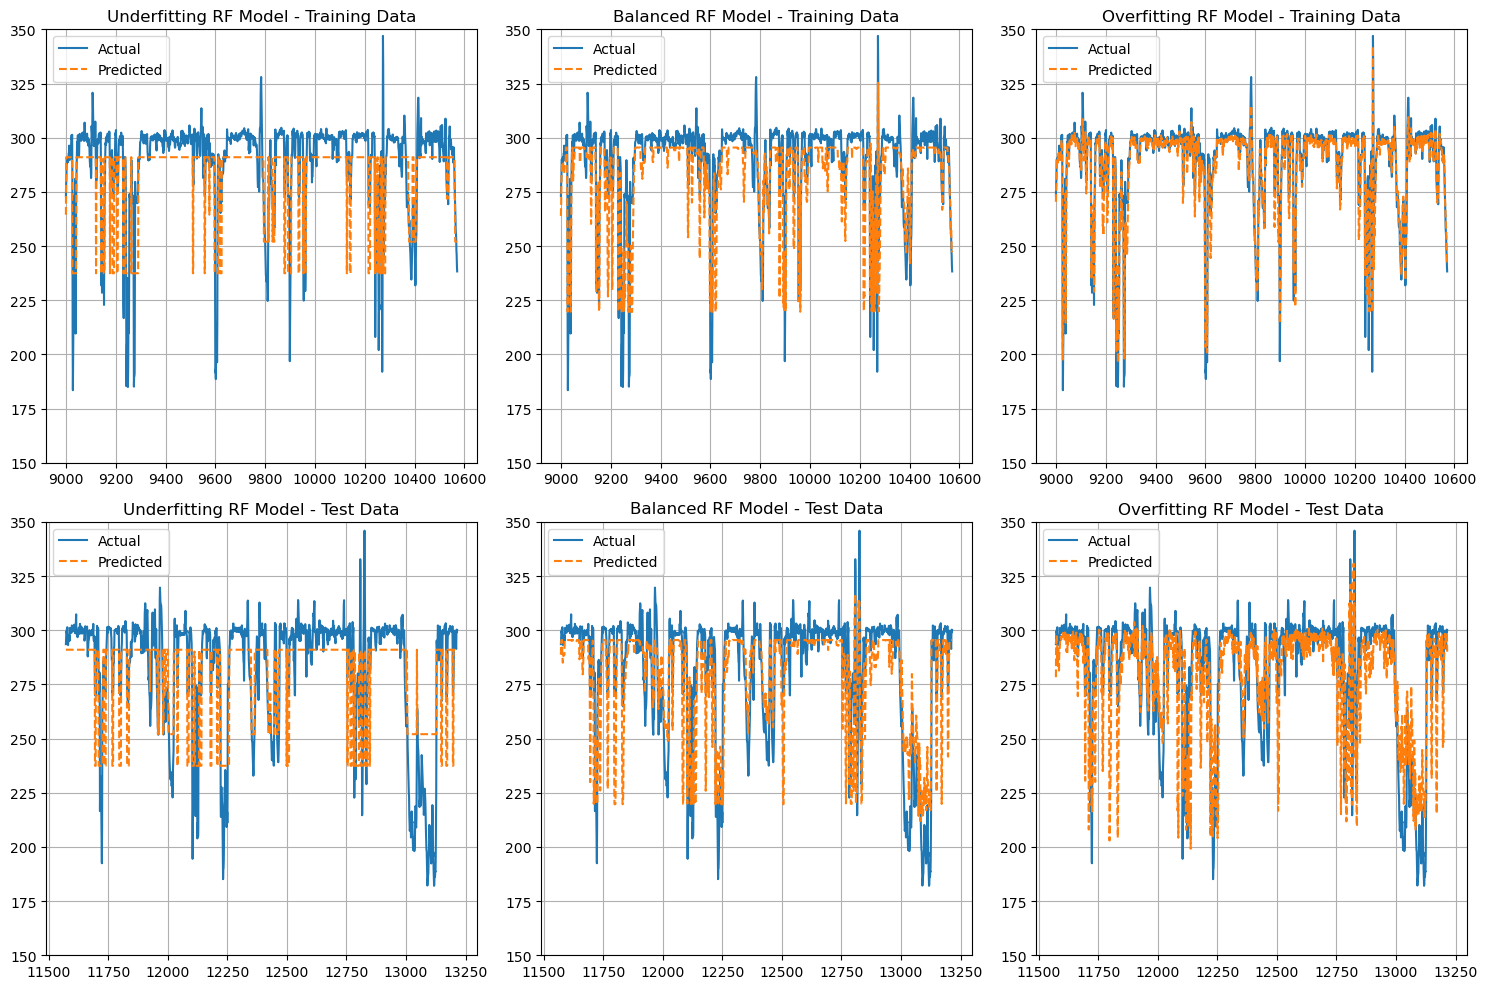

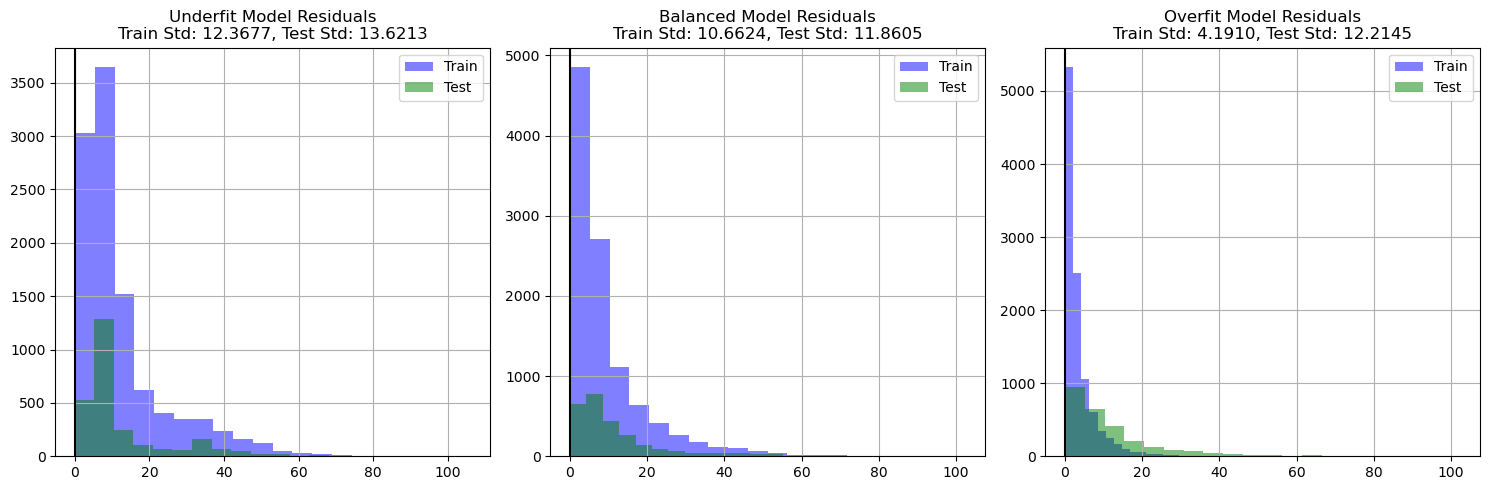

In [229]:
# Create figure for residual plots
plt.figure(figsize=(15, 10))

# 1. Underfit Model Residuals
plt.subplot(2, 3, 1)
plt.plot(y_trainval.index[9000:], y_trainval[9000:], label='Actual')
plt.plot(y_trainval.index[9000:], y_train_rf_pred_underfit[9000:], label='Predicted', linestyle='dashed')
plt.title("Underfitting RF Model - Training Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(y_test.index[1000:], y_test[1000:], label='Actual')
plt.plot(y_test.index[1000:], y_test_rf_pred_underfit[1000:], label='Predicted', linestyle='dashed')
plt.title("Underfitting RF Model - Test Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

# 2. Balanced Model Residuals
plt.subplot(2, 3, 2)
plt.plot(y_trainval.index[9000:], y_trainval[9000:], label='Actual')
plt.plot(y_trainval.index[9000:], y_train_rf_pred_balanced[9000:], label='Predicted', linestyle='dashed')
plt.title("Balanced RF Model - Training Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(y_test.index[1000:], y_test[1000:], label='Actual')
plt.plot(y_test.index[1000:], y_test_rf_pred_balanced[1000:], label='Predicted', linestyle='dashed')
plt.title("Balanced RF Model - Test Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

# 3. Overfit Model Residuals
plt.subplot(2, 3, 3)
plt.plot(y_trainval.index[9000:], y_trainval[9000:], label='Actual')
plt.plot(y_trainval.index[9000:], y_train_rf_pred_overfit[9000:], label='Predicted', linestyle='dashed')
plt.title("Overfitting RF Model - Training Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(y_test.index[1000:], y_test[1000:], label='Actual')
plt.plot(y_test.index[1000:], y_test_rf_pred_overfit[1000:], label='Predicted', linestyle='dashed')
plt.title("Overfitting RF Model - Test Data")
plt.ylim(150, 350)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Summary statistics for residuals
plt.figure(figsize=(15, 5))

# Calculate histograms of residuals
plt.subplot(1, 3, 1)
plt.hist(train_rf_residuals_underfit, bins=20, alpha=0.5, color='blue', label='Train')
plt.hist(test_rf_residuals_underfit, bins=20, alpha=0.5, color='green', label='Test')
plt.title(f'Underfit Model Residuals\nTrain Std: {np.std(train_rf_residuals_underfit):.4f}, Test Std: {np.std(test_rf_residuals_underfit):.4f}')
plt.axvline(x = 0, color = "black")
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(train_rf_residuals_balanced, bins=20, alpha=0.5, color='blue', label='Train')
plt.hist(test_rf_residuals_balanced, bins=20, alpha=0.5, color='green', label='Test')
plt.title(f'Balanced Model Residuals\nTrain Std: {np.std(train_rf_residuals_balanced):.4f}, Test Std: {np.std(test_rf_residuals_balanced):.4f}')
plt.axvline(x = 0, color = "black")
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(train_rf_residuals_overfit, bins=20, alpha=0.5, color='blue', label='Train')
plt.hist(test_rf_residuals_overfit, bins=20, alpha=0.5, color='green', label='Test')
plt.title(f'Overfit Model Residuals\nTrain Std: {np.std(train_rf_residuals_overfit):.4f}, Test Std: {np.std(test_rf_residuals_overfit):.4f}')
plt.axvline(x = 0, color = "black")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()